In [2]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.7
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

---------------------
Welcome to dendextend version 1.9.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

Th

In [3]:
df <- mtcars
df <- na.omit(df)
df <- scale(df)
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


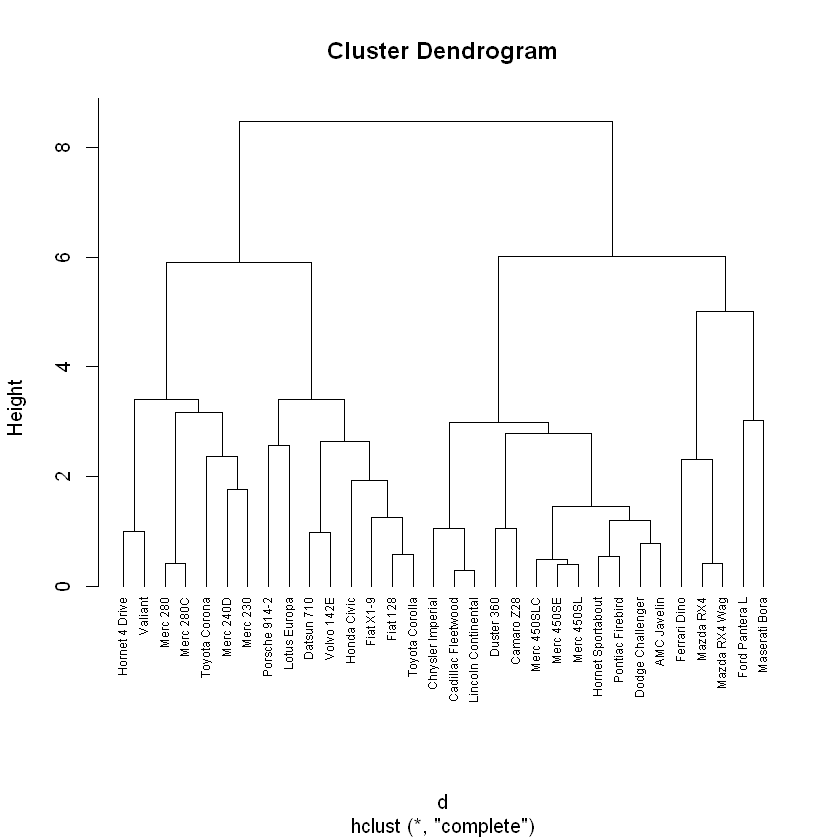

In [6]:
# Dissimilarity matrix
d <- dist(df, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

#  (i.e. “complete”, “average”, “single”, “ward.D”)

In [7]:
# Compute with agnes
hc2 <- agnes(df, method = "complete")

# Agglomerative coefficient
hc2$ac
## [1] 0.8531583

[1] 0.8636151

In [8]:
# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(df, method = x)$ac
}

map_dbl(m, ac)

average    single  complete      ward 
0.7898219 0.6400643 0.8636151 0.9338742

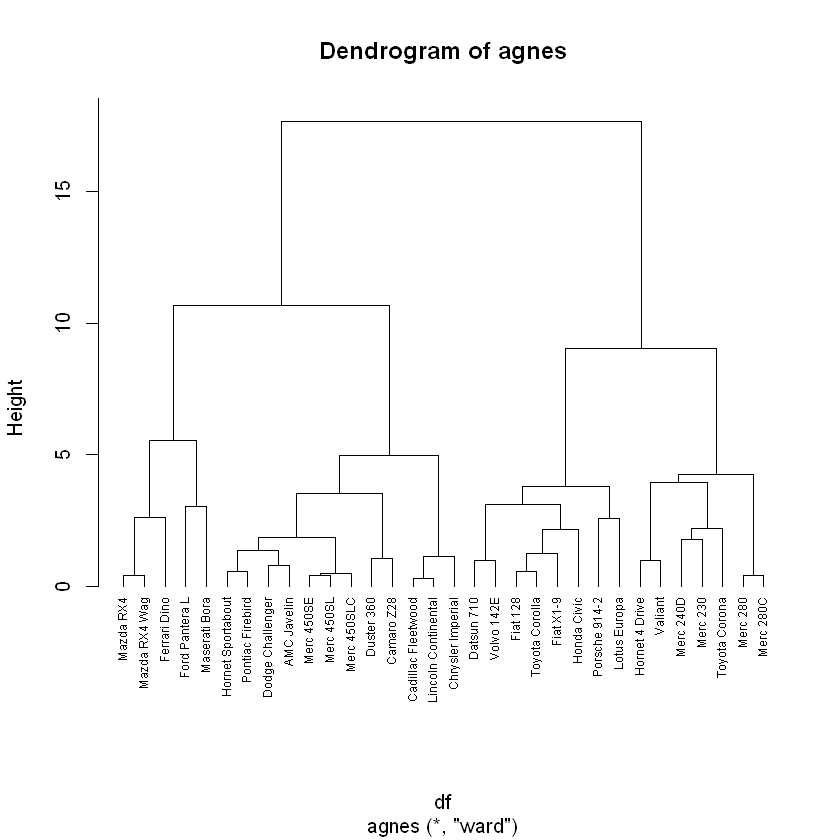

In [9]:
hc3 <- agnes(df, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

In [12]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

# Number of members in each cluster
table(sub_grp)

head(df)

sub_grp
 1  2  3  4 
 5  8  7 12 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


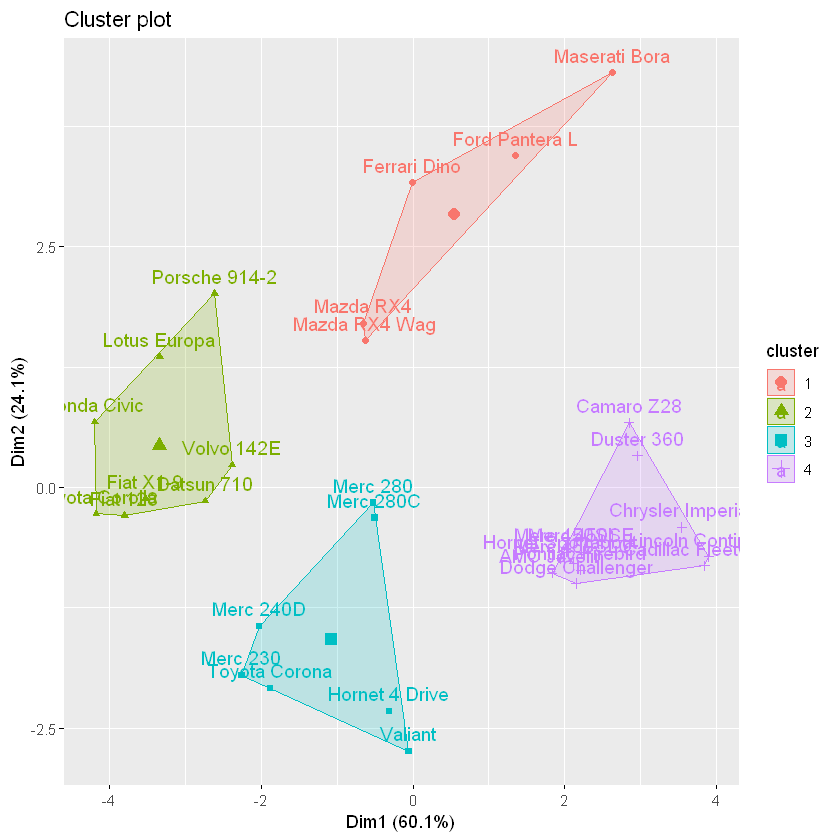

In [13]:
fviz_cluster(list(data = df, cluster = sub_grp))

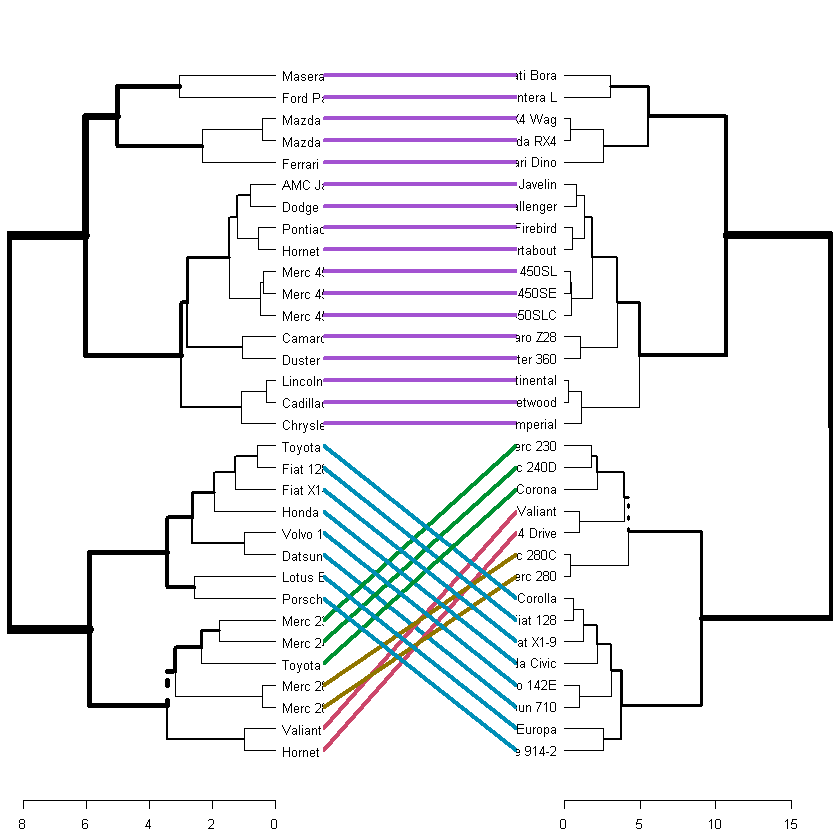

In [14]:
# Compute distance matrix
res.dist <- dist(df, method = "euclidean")

# Compute 2 hierarchical clusterings
hc1 <- hclust(res.dist, method = "complete")
hc2 <- hclust(res.dist, method = "ward.D2")

# Create two dendrograms
dend1 <- as.dendrogram (hc1)
dend2 <- as.dendrogram (hc2)

tanglegram(dend1, dend2)

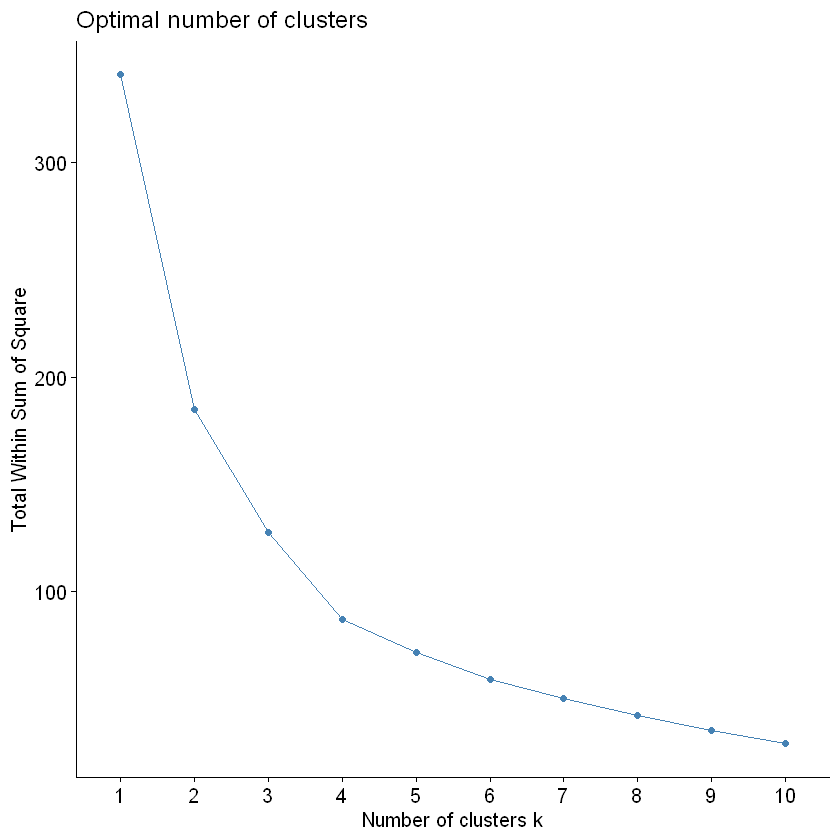

In [16]:
#  determined optimal clusters with k-means clustering
# Elbowmethod

fviz_nbclust(df, FUN = hcut, method = "wss")

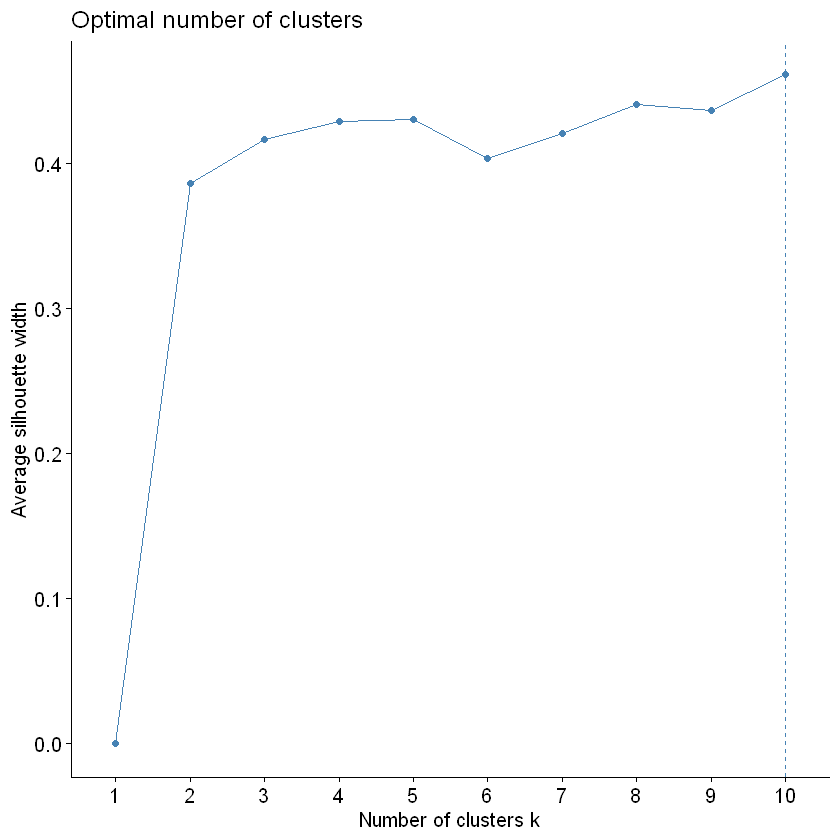

In [17]:
fviz_nbclust(df, FUN = hcut, method = "silhouette")

In [18]:
library(pvclust)

In [19]:
result <- pvclust(df, method.dist="cor", method.hclust="average", nboot=1000)

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.59)... Done.
Bootstrap (r = 0.69)... Done.
Bootstrap (r = 0.78)... Done.
Bootstrap (r = 0.88)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.09)... Done.
Bootstrap (r = 1.19)... Done.
Bootstrap (r = 1.28)... Done.
Bootstrap (r = 1.38)... Done.


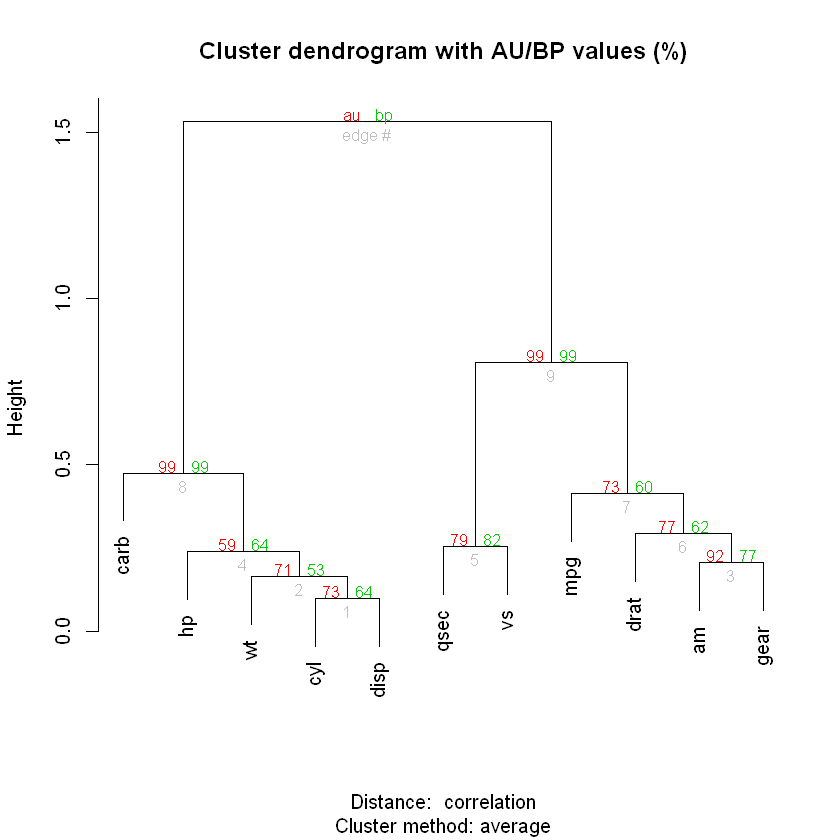

In [20]:
plot(result)

In [21]:
# The mtcars dataset:
data=as.matrix(mtcars)
head(data)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


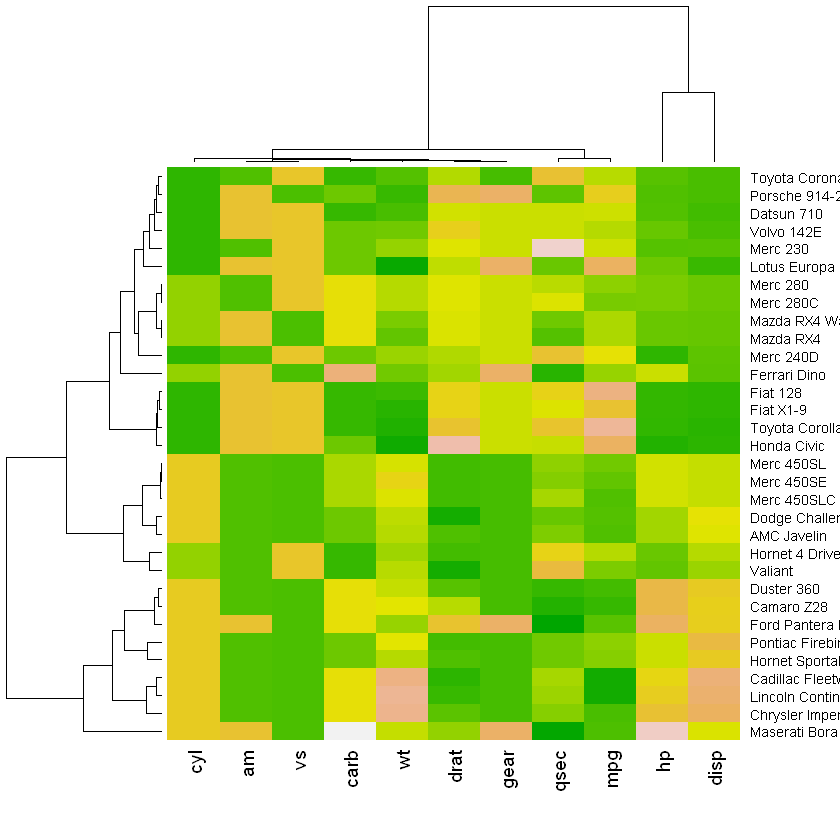

In [24]:
# Use 'scale' to normalize (right)
heatmap(data, scale="column", col = terrain.colors(256))